# Sentiment Analysis from A14 road users comments

## Introduction

The user of the [A14 road](https://highwaysengland.co.uk/A14-Cambridge-to-Huntingdon-Improvement-Scheme-home) can report incident using an application. The goal of this challenge proposed by the organizers of the [Project:Hack5 hackathon](https://projectdataanalytics.uk/eventer/projecthack-5) and [Highways England](https://highwaysengland.co.uk/) is to perform sentiment analysis to obtain new insigts from the users comments and improve the user experiences on the application.

# Variables Description

* ID: identification number of the user reporting an incident on the A14 road
* PracticeType: User entered report nature: Hazard or Good Practice Observation
* IncidentType: Type of event reported
* HSWorEn: Nature of the incident: Health and Safety or Environement
* Section: Section of A14 road where the incident occured
* Location: Precised location on the section
* ObservationDateTime: Data and time of the user from completion
* Summary: Short sumary of the report entered by the user
* Description: Full description of the event by the user
* ActionTaken: Action taken by Highways England
* FatalCategory: Category of the incident
* HEObservationCategory: Category of the Health and Safety Observation
* HEReportingType: Health and Safety reporting

## Initialization

In [3]:
# load libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # ploting the data
import seaborn as sns # ploting the data
import math # calculation

from textblob import TextBlob #test analysis
import nltk
from wordcloud import WordCloud # to generatewordcloud analysis

In [4]:
# Mount the drive folder
from google.colab import drive # to load data from google drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Data_science/A14_sentiment_analysis/Data/Observations2.csv', engine = "python")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72446 entries, 0 to 72445
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     72446 non-null  int64 
 1   PracticeType           72411 non-null  object
 2   IncidentType           71850 non-null  object
 3   HSWorEnv               72446 non-null  object
 4   Section                72233 non-null  object
 5   Location               71827 non-null  object
 6   ObservationDateTime    72443 non-null  object
 7   Summary                72438 non-null  object
 8   Description            10863 non-null  object
 9   ActionTaken            67690 non-null  object
 10  FatalCategory          1470 non-null   object
 11  HEObservationCategory  915 non-null    object
 12  HEReportingType        7223 non-null   object
dtypes: int64(1), object(12)
memory usage: 7.2+ MB


In [7]:
# Drop the unnecessary variables or the variables not entered by the user in the application
df.drop(['ID', 'HSWorEnv', 'Location', 'FatalCategory', 'HEObservationCategory'], axis=1, inplace=True)

## Add scores column

In [8]:
# Polarity: 
def extract_sentiment_polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

def extract_sentiment_subjectivity(text):
    try:
        return TextBlob(text).sentiment.subjectivity
    except:
        return None
    
df["Summary_polarity"] = df["Summary"].apply(extract_sentiment_polarity)
df["Summary_subjectivity"] = df["Summary"].apply(extract_sentiment_subjectivity)

df["Description_polarity"] = df["Description"].apply(extract_sentiment_polarity)
df["Description_subjectivity"] = df["Description"].apply(extract_sentiment_subjectivity)

df["ActionTaken_polarity"] = df["ActionTaken"].apply(extract_sentiment_polarity)
df["ActionTaken_subjectivity"] = df["ActionTaken"].apply(extract_sentiment_subjectivity)

## Visualization

In [9]:
# Set up visualization colors

# Set up color blind friendly color palette
# The palette with grey:
cbPalette = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
# The palette with black:
cbbPalette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

# sns.palplot(sns.color_palette(cbPalette))
# sns.palplot(sns.color_palette(cbbPalette))

sns.set_palette(cbPalette)
#sns.set_palette(cbbPalette)

### Categories count

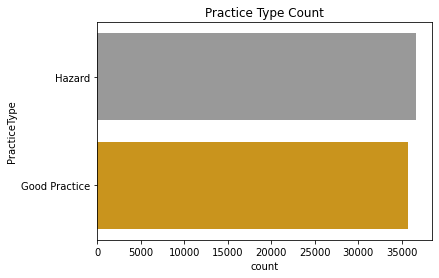

In [10]:
title = 'Practice Type Count'
sns.countplot(y = df['PracticeType'])
plt.title(title)
plt.ioff()

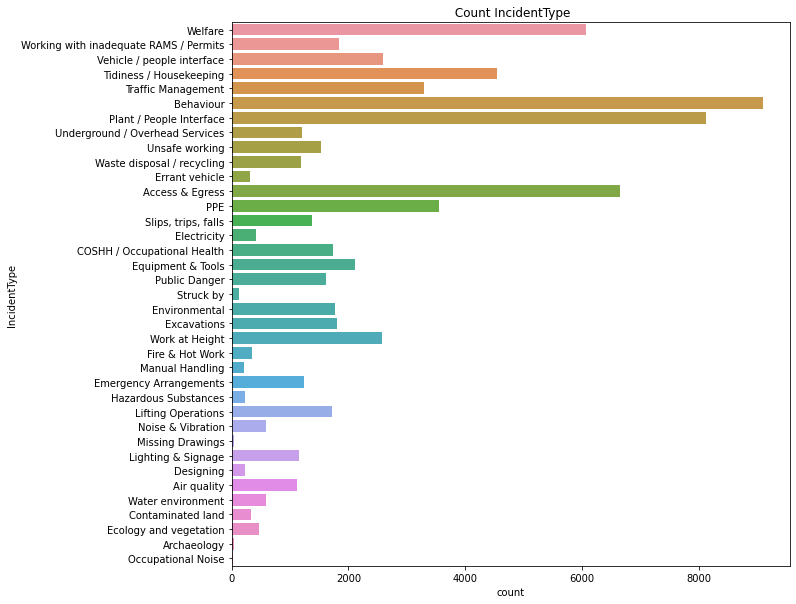

In [11]:
title = ' Count IncidentType'
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(y = df['IncidentType'])
plt.title(title)
plt.ioff()

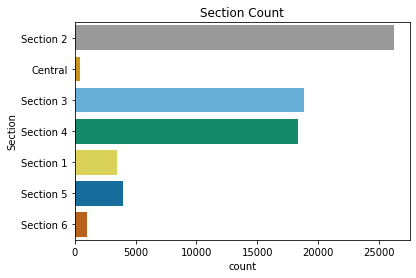

In [12]:
title = 'Section Count'
sns.countplot(y = df['Section'])
plt.title(title)
plt.ioff()

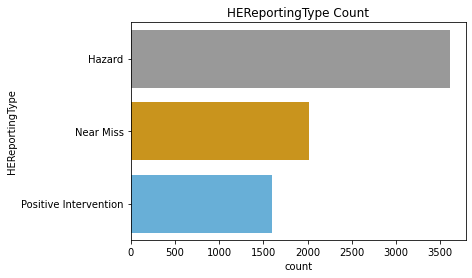

In [13]:
title = 'HEReportingType Count'
sns.countplot(y = df['HEReportingType'])
plt.title(title)
plt.ioff()

### PracticeType according to sentiment

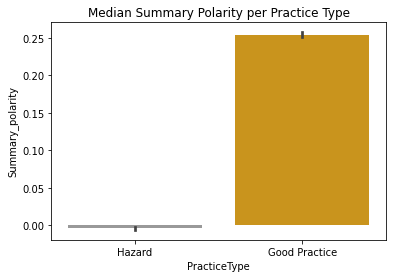

In [14]:
title = 'Median Summary Polarity per Practice Type'
result = df.groupby(["PracticeType"])['Summary_polarity'].aggregate(np.median).reset_index().sort_values('Summary_polarity')
sns.barplot(x='PracticeType', y="Summary_polarity", data=df)
plt.title(title)
plt.ioff()

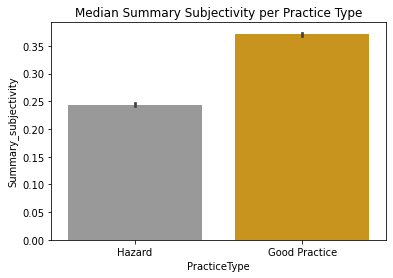

In [15]:
title = 'Median Summary Subjectivity per Practice Type'
result = df.groupby(['PracticeType'])['Summary_subjectivity'].aggregate(np.median).reset_index().sort_values('Summary_subjectivity')
sns.barplot(x='PracticeType', y='Summary_subjectivity', data=df)
plt.title(title)
plt.ioff()

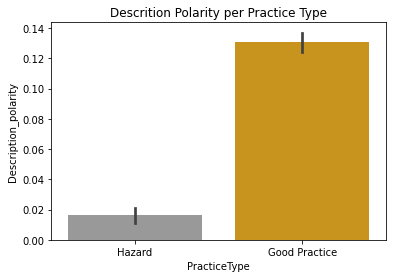

In [16]:
title = 'Descrition Polarity per Practice Type'
result = df.groupby(['PracticeType'])['Description_polarity'].aggregate(np.median).reset_index().sort_values('Description_polarity')
sns.barplot(x='PracticeType', y='Description_polarity', data=df)
plt.title(title)
plt.ioff()

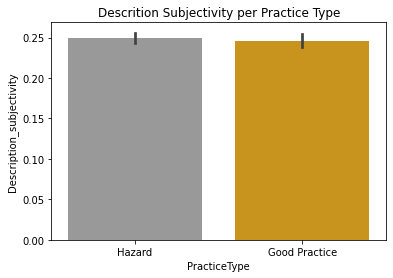

In [17]:
title = 'Descrition Subjectivity per Practice Type'
result = df.groupby(['PracticeType'])['Description_subjectivity'].aggregate(np.median).reset_index().sort_values('Description_subjectivity')
sns.barplot(x='PracticeType', y='Description_subjectivity', data=df)
plt.title(title)
plt.ioff()

### Sentiment per section

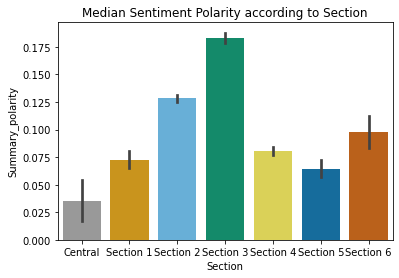

In [18]:
# see https://www.kaggle.com/nidaguler/eda-and-data-visualization-ny-airbnb
title = 'Median Sentiment Polarity according to Section'
result = df.groupby(['Section'])['Summary_polarity'].aggregate(np.median).reset_index().sort_values('Summary_polarity')
sns.barplot(x='Section', y='Summary_polarity', data=df, order=result['Section'])
plt.title(title)
plt.ioff()

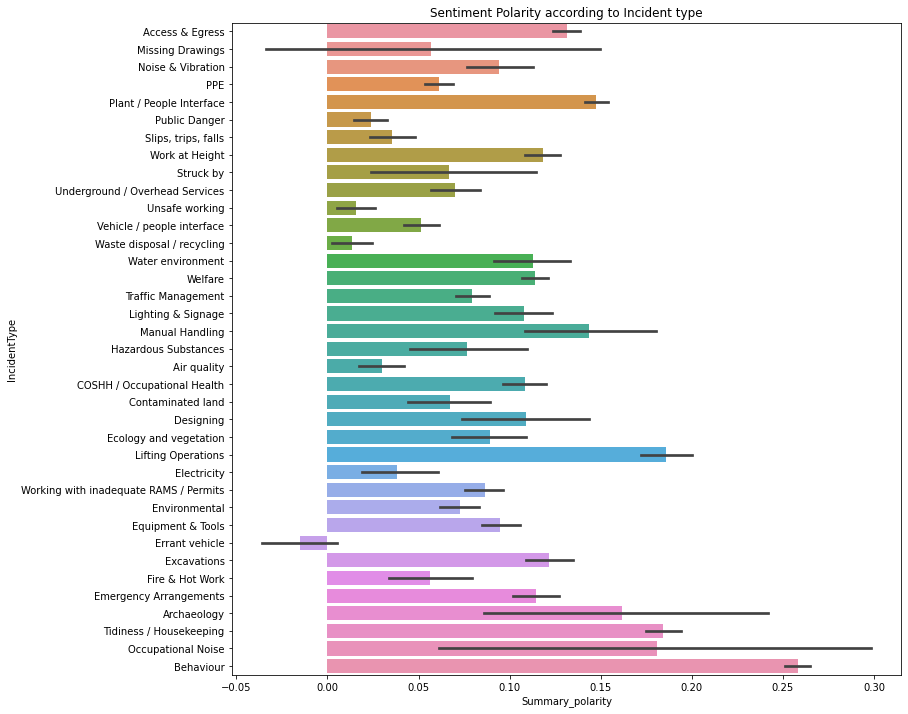

In [19]:
f, ax = plt.subplots(figsize=(12, 12))
title = 'Sentiment Polarity according to Incident type'
result = df.groupby(['IncidentType'])['Summary_polarity'].aggregate(np.median).reset_index().sort_values('Summary_polarity')
sns.barplot(y='IncidentType', x='Summary_polarity', data=df, order=result['IncidentType'])
plt.title(title)
plt.ioff()

### Association between categorical variables

In [20]:
pd.crosstab(index=df['PracticeType'], columns=df['IncidentType'])

IncidentType,Access & Egress,Air quality,Archaeology,Behaviour,COSHH / Occupational Health,Contaminated land,Designing,Ecology and vegetation,Electricity,Emergency Arrangements,Environmental,Equipment & Tools,Errant vehicle,Excavations,Fire & Hot Work,Hazardous Substances,Lifting Operations,Lighting & Signage,Manual Handling,Missing Drawings,Noise & Vibration,Occupational Noise,PPE,Plant / People Interface,Public Danger,"Slips, trips, falls",Struck by,Tidiness / Housekeeping,Traffic Management,Underground / Overhead Services,Unsafe working,Vehicle / people interface,Waste disposal / recycling,Water environment,Welfare,Work at Height,Working with inadequate RAMS / Permits
PracticeType,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Good Practice,2958,290,35,6347,1019,149,96,260,111,736,794,1140,21,892,170,112,1311,424,162,12,478,17,1166,4409,379,276,21,2429,1138,536,180,553,419,363,2861,1905,1185
Hazard,3687,827,7,2746,722,189,140,203,315,495,982,980,289,915,177,115,401,723,54,35,113,10,2387,3704,1230,1100,99,2115,2154,673,1350,2030,767,228,3205,676,650


In [21]:
contingency_table = pd.crosstab(index=df['PracticeType'], 
                          columns=df['Section'])
contingency_table

Section,Central,Section 1,Section 2,Section 3,Section 4,Section 5,Section 6
PracticeType,,,,,,,
Good Practice,110,1392,15996,9976,6126,1372,754
Hazard,319,2097,10165,8879,12176,2582,256


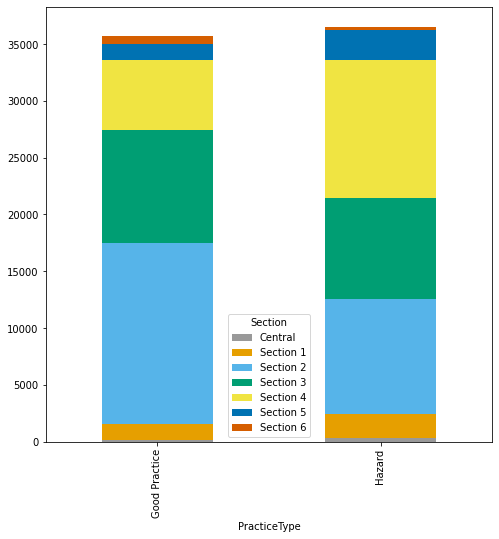

In [22]:
contingency_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [23]:
contingency_table = pd.crosstab(index=df['PracticeType'], 
                          columns=df['HEReportingType'])
contingency_table

HEReportingType,Hazard,Near Miss,Positive Intervention
PracticeType,,,
Good Practice,195,197,1129
Hazard,3407,1824,468


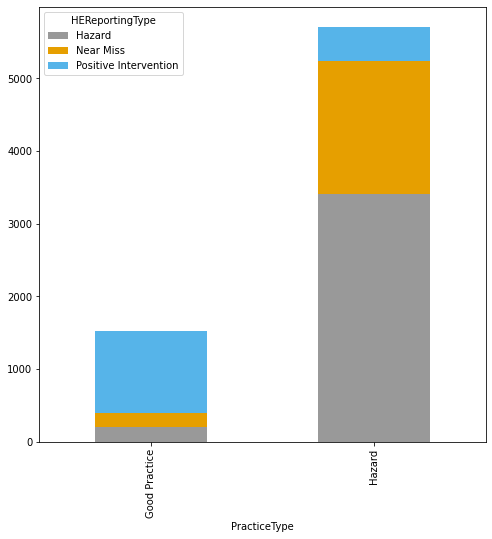

In [24]:
contingency_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

### Wordcloud analysis

In [25]:
# Separate the data into Hazard and Good Practice dataset
df_Hazard = df.loc[(df['PracticeType'] == 'Hazard')]
df_Good = df.loc[(df['PracticeType'] == 'Good Practice')]

In [26]:
# See https://stackoverflow.com/questions/33279940/how-to-combine-multiple-rows-of-strings-into-one-using-pandas
text_hazard = df_Hazard.Summary.str.cat(sep=', ') # Contenate the text of all rows of the Summary column
print ("There are {} words in the combination of all Summary.".format(len(text_hazard)))

There are 3366396 words in the combination of all Summary.


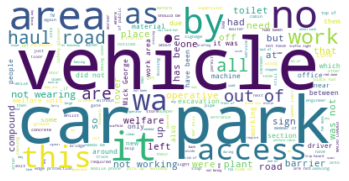

In [27]:
# https://www.datacamp.com/community/tutorials/wordcloud-python
# Create stopword list:
stopwords = (['for', 'in', 'the', 'and', 'on', 'site', 'to', 'or', 'with', 'from', 'A14', 'when', 'there', 'is'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_hazard)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
text_good = df_Good.Summary.str.cat(sep=', ') # Contenate the text of all rows of the Summary column
print ("There are {} words in the combination of all Summary.".format(len(text_good)))

There are 2987230 words in the combination of all Summary.


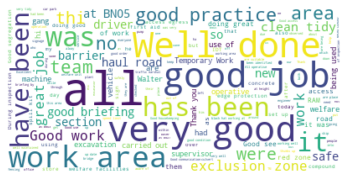

In [29]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_good)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Modeling the Practice Type

The goal is to generate autocompletion form for the application users. If we can pre filled some entries the users are more likely to complete the whole form.

In [30]:
df.drop(['ObservationDateTime', 'Summary', 'Description', 'ActionTaken', 'HEReportingType'], axis=1, inplace=True)

### Data Encoding

In [31]:
# Encoding categorical data
# See https://pbpython.com/categorical-encoding.html
#data = pd.get_dummies(data, columns=['IncidentType', 'Section', 'HEReportingType'], drop_first=True)
df = pd.get_dummies(df, columns=['IncidentType', 'Section'], drop_first=True)

### Deal with missing values

In [32]:
# Keep only the row with known PracticeType
df =  df.loc[(df['PracticeType'] == 'Hazard') | (df['PracticeType'] == 'Good Practice')]

In [33]:
# Split the dataset
y = df['PracticeType'].values

In [34]:
# https://machinelearningmastery.com/handle-missing-data-python/
from sklearn.impute import SimpleImputer
values = df.drop('PracticeType', axis=1).values
imputer = SimpleImputer()
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print(np.isnan(transformed_values).sum())

0


In [35]:
X = transformed_values

### Split the dataset

In [36]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Fit the model: Random Forest¶

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

accuracy_score(y_test, y_predict)

0.8464831522739827

# Conclusion

Using a Random Forest model, we can predict the nature of the user observation with an 84% accuracy. We could then use this model to prefill this variable on the form filled by the A14 users. This approach will reduce the amount of data to enter for the users and likely increase the form completion rate.

## References
### Visualization
* https://www.analyticsvidhya.com/blog/2019/09/comprehensive-data-visualization-guide-seaborn-python/
* https://elitedatascience.com/python-seaborn-tutorial

### Categorical Variables
* https://dzone.com/articles/correlation-between-categorical-and-continuous-var-1
* https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/

### Natural Language Processing
* https://textblob.readthedocs.io/en/dev/quickstart.html
* https://planspace.org/20150607-textblob_sentiment/

### Machine Learning
* https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd
* https://stackoverflow.com/questions/3172509/numpy-convert-categorical-string-arrays-to-an-integer-array

### Wordcloud analysis
* https://www.datacamp.com/community/tutorials/wordcloud-python
* https://www.kaggle.com/zynicide/wine-reviews/kernels

### Modeling
* https://ehackz.com/2018/03/23/python-scikit-learn-random-forest-classifier-tutorial/
* https://scikit-learn.org/stable/modules/ensemble.html

### Missing values
* https://machinelearningmastery.com/handle-missing-data-python/